In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import os
os.listdir('.')
os.getcwd()
os.chdir('/content/drive/My Drive/BMI project')
os.getcwd()

'/content/drive/My Drive/BMI project'

In [8]:
import pandas as pd

csv_file = '/content/drive/My Drive/BMI project/mli_train_v1.csv'


sentence = pd.read_csv(csv_file)
sentence.head(3)

,premise,hypothesis,gold_label
0,Labs were notable for Cr 1.7 (baseline 0.5 per...,Patient has elevated Cr,entailment
1,Labs were notable for Cr 1.7 (baseline 0.5 per...,Patient has normal Cr,contradiction
2,Labs were notable for Cr 1.7 (baseline 0.5 per...,Patient has elevated BUN,neutral


## **Number of characters present in each sentence:**

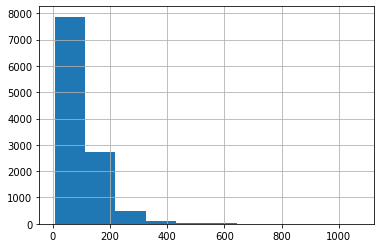

In [11]:
#premise
sentence['premise'].str.len().hist()

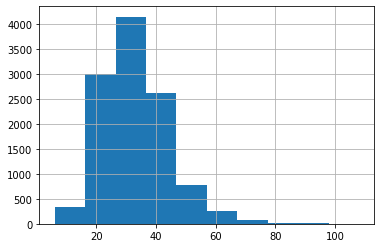

In [13]:
#hypothesis
sentence['hypothesis'].str.len().hist()

## **Number of words present in each sentence:**

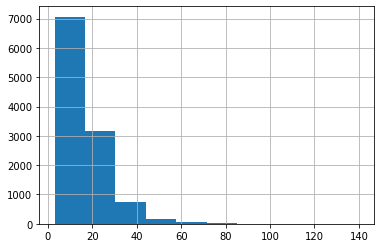

In [15]:
#premise
sentence['premise'].str.split().map(lambda x: len(x)).hist()

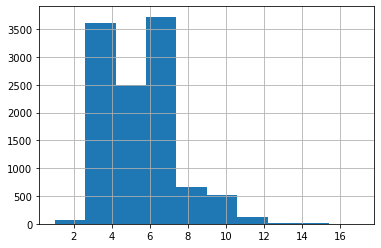

In [16]:
#hypothesis
sentence['hypothesis'].str.split().map(lambda x: len(x)).hist()

## **Average word length in each sentence:**

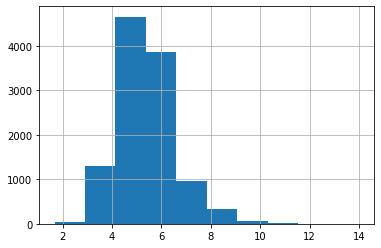

In [18]:
import numpy as np
#premise
sentence['premise'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

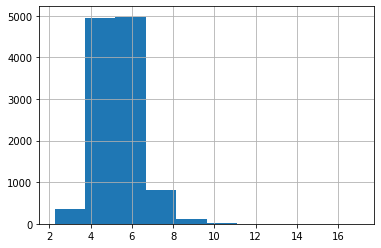

In [19]:
#hypothesis
sentence['hypothesis'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

## **Stopwords & Most frequent words**

In [22]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
import matplotlib.pyplot as plt
def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)

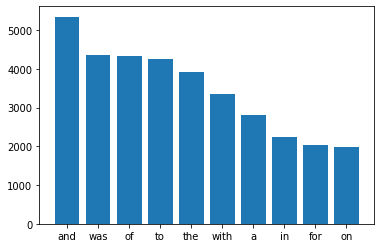

In [37]:
#premise
plot_top_stopwords_barchart(sentence['premise'])

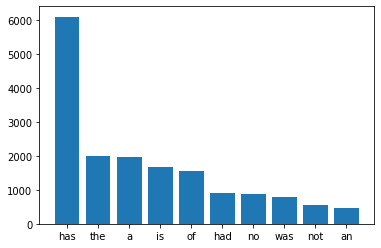

In [43]:
#hypothesis
plot_top_stopwords_barchart(sentence['hypothesis'])

## **Most frequent words**

In [46]:
from collections import Counter
import seaborn as sns

def plot_most_frequent_words_barchart(text):
  new= text.str.split()
  new=new.values.tolist()
  corpus=[word for i in new for word in i]
  counter=Counter(corpus)
  most=counter.most_common()
  x, y= [], []
  for word,count in most[:40]:
      if (word not in stop):
          x.append(word)
          y.append(count)
          
  sns.barplot(x=y,y=x)

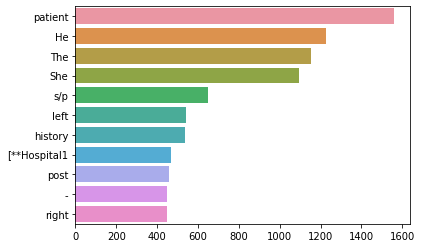

In [47]:
#premise
plot_most_frequent_words_barchart(sentence['premise'])

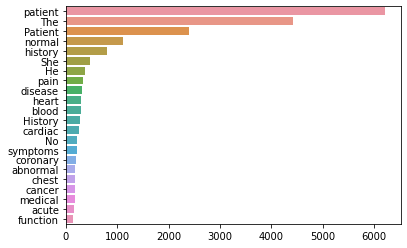

In [48]:
#hypothesis
plot_most_frequent_words_barchart(sentence['hypothesis'])

## **Top bigrams**

In [56]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    x,y=map(list,zip(*words_freq[:10][:10]))
    sns.barplot(x=y,y=x)


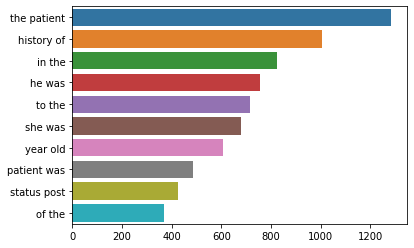

In [57]:
#premise
get_top_ngram(sentence['premise'], 2)

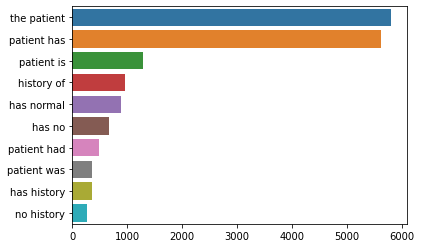

In [58]:
#hypothesis
get_top_ngram(sentence['hypothesis'], 2)

## **Top trigrams**

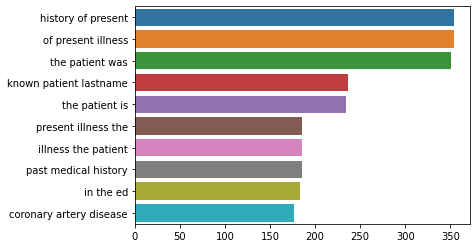

In [59]:
#premise
get_top_ngram(sentence['premise'], 3)

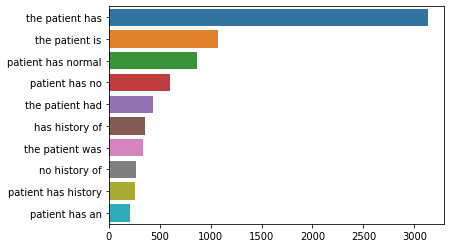

In [60]:
#hypothesis
get_top_ngram(sentence['hypothesis'], 3)

## **Word Cloud**

In [65]:
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('punkt')
nltk.download('wordnet')

def plot_wordcloud(text):
    nltk.download('stopwords')
    stop=set(stopwords.words('english'))

    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    wordcloud = WordCloud(
        background_color='white',
        stopwords=set(STOPWORDS),
        max_words=100,
        max_font_size=30, 
        scale=3,
        random_state=1)
    
    wordcloud=wordcloud.generate(str(corpus))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
 
    plt.imshow(wordcloud)
    plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


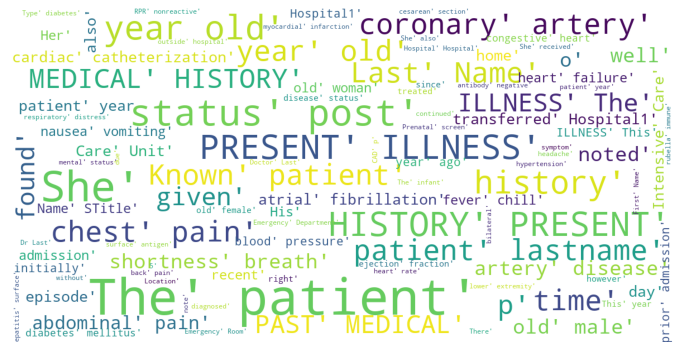

In [66]:
#premise
plot_wordcloud(sentence['premise'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


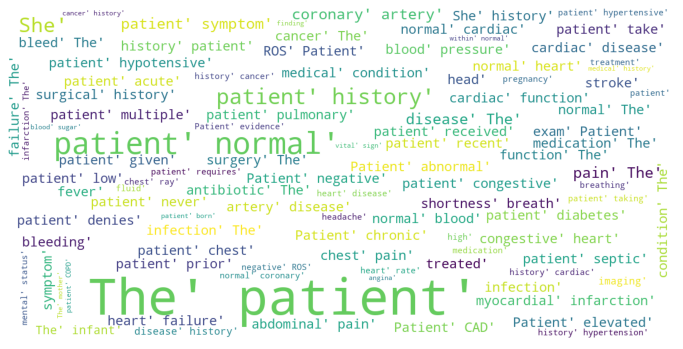

In [67]:
#hypothesis
plot_wordcloud(sentence['hypothesis'])

## **Sentiment Analysis**

In [71]:
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

def sentiment_vader(text, sid):
    ss = sid.polarity_scores(text)
    ss.pop('compound')
    return max(ss, key=ss.get)
    
def plot_sentiment_barchart(text):
    nltk.download('vader_lexicon')
    sid = SentimentIntensityAnalyzer()
    sentiment = text.map(lambda x: sentiment_vader(x, sid=sid))
    
    plt.bar(sentiment.value_counts().index,
            sentiment.value_counts())

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


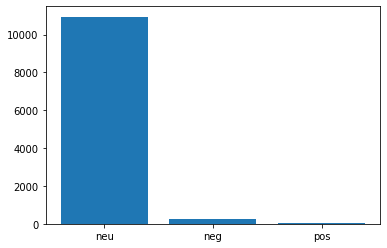

In [72]:
#premise
plot_sentiment_barchart(sentence['premise'])

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


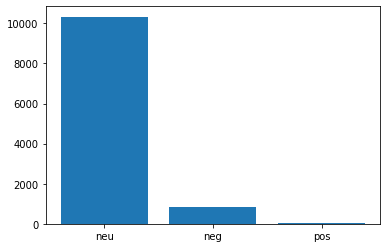

In [74]:
#hypothesis
plot_sentiment_barchart(sentence['hypothesis'])